In [1]:
# https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy
# http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html


from sklearn.datasets import make_checkerboard,make_moons, make_circles, make_classification
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_validate
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process, neural_network
from xgboost import XGBClassifier

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


def make_xor(n_points):
    centers = np.array([[0,0],[0,1],[1,0],[1,1]])
    labels = np.array([0,1,1,0])
    data = np.array([]).reshape(-1,3)
    for center, label in zip(centers,labels):
        points = np.random.normal(loc=center,scale=0.2,size=(n_points//4,2))
        points_labels = np.hstack((points,label*np.ones(n_points//4).reshape((-1, 1))))
        data = np.vstack((data,points_labels))
    return (data[:,[0,1]],data[:,2])



def make_linear(n_points):
    X, y = make_classification(n_features=2,
                               n_redundant=0,
                               n_informative=2,
                               random_state=1,
                               n_clusters_per_class=1,
                               n_samples=n_points)
    rng = np.random.RandomState(2)
    X += 2 * rng.uniform(size=X.shape)
    return (X, y)

n_points = 1000

datasets = [
    make_linear(n_points),
    make_xor(n_points),
    make_moons(noise=0.2, random_state=0,n_samples=n_points),
    make_circles(noise=0.2, factor=0.5, random_state=1,n_samples=n_points)    
            ]

datasets_names = ["Linearly Separable","XOR","Moons","Circles"]


Estimators = [
    
    linear_model.LogisticRegression(n_jobs=-1),
    linear_model.Perceptron(n_jobs=-1),
 
    svm.LinearSVC(),
    svm.SVC(), 
    
    neural_network.MLPClassifier(),
    
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),  

    gaussian_process.GaussianProcessClassifier(n_jobs=-1),
    
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    neighbors.KNeighborsClassifier(n_jobs=-1),  
        
    
    tree.DecisionTreeClassifier(),
    
    ensemble.RandomForestClassifier(n_jobs=-1) ,
    ensemble.ExtraTreesClassifier(n_jobs=-1),
    
    ensemble.AdaBoostClassifier(),
    ensemble.GradientBoostingClassifier(),
    XGBClassifier(n_jobs=-1)    
    ]


#picture

# color maps for contour and points
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])



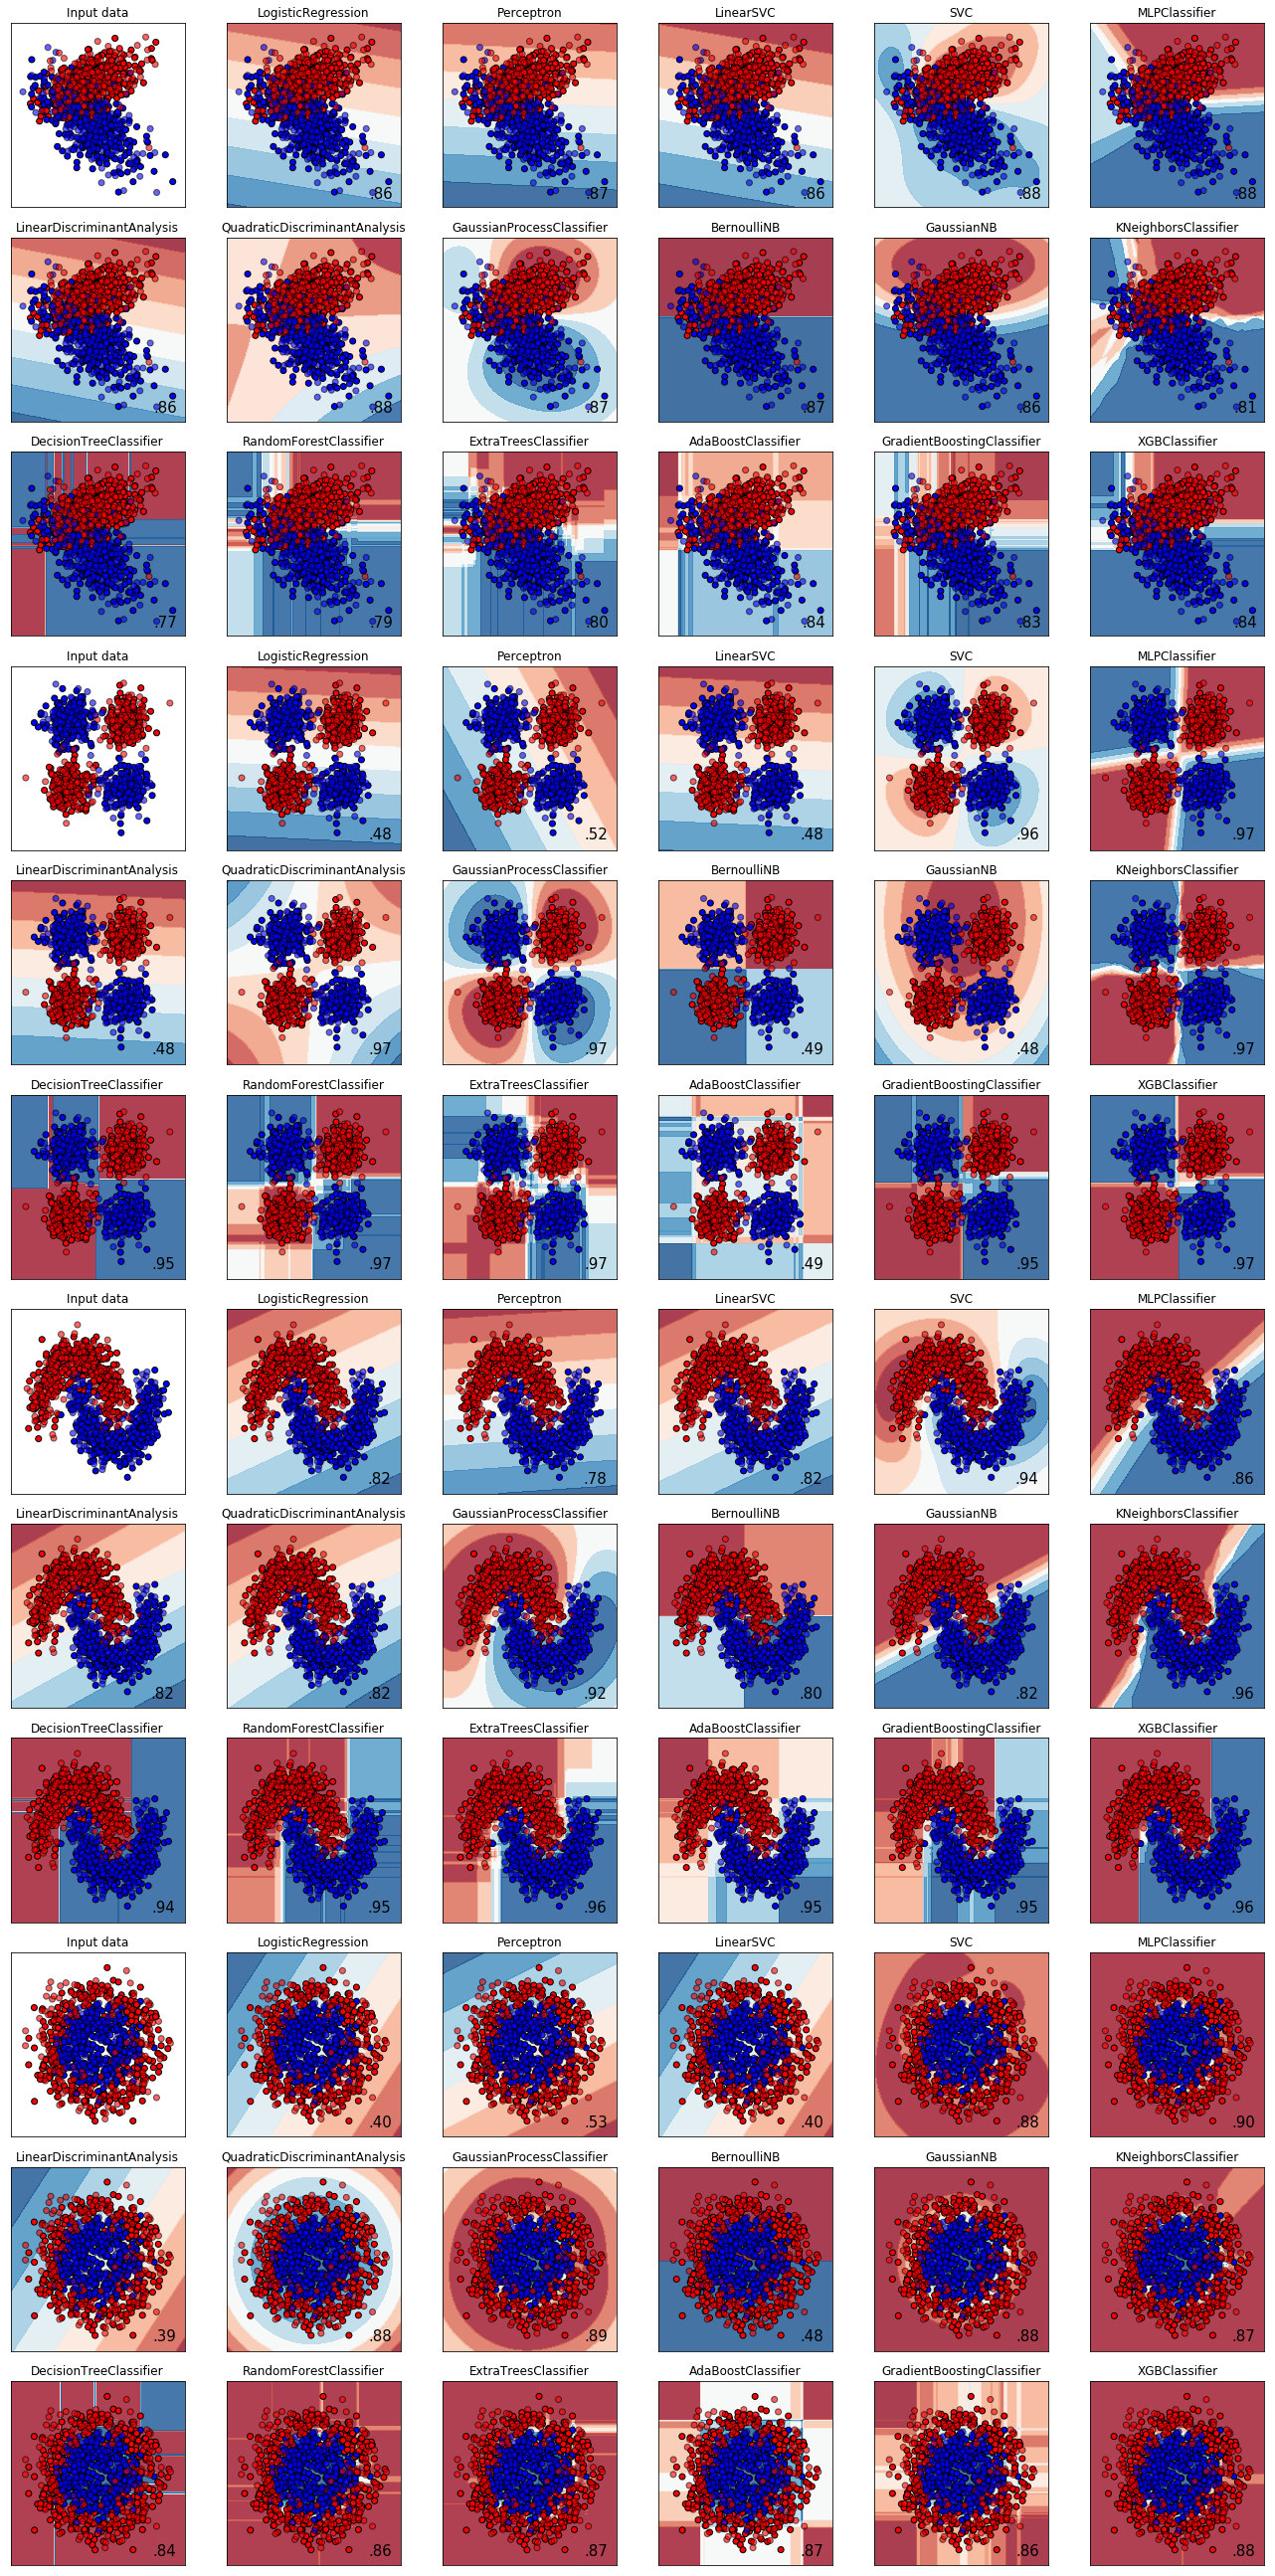

In [2]:
n_column_plots  = 6
n_row_plots_per_ds  = 4

figure = plt.figure(figsize=(18, 3*n_row_plots_per_ds*len(datasets)))
i = 1

h = .02

for ds in datasets:
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    ax = plt.subplot(n_row_plots_per_ds*len(datasets), n_column_plots, i)
    ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
                   edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    i+=1
    for alg in Estimators:
        name = alg.__class__.__name__
        ax = plt.subplot(n_row_plots_per_ds*len(datasets), n_column_plots, i)
        alg.fit(X_train, y_train)
        score = alg.score(X_test, y_test)    
        if hasattr(alg, "decision_function"):
            Z = alg.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = alg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),size=15, horizontalalignment='right')
        i += 1
plt.tight_layout()
plt.savefig('ClassificationExamples.png')
plt.show()

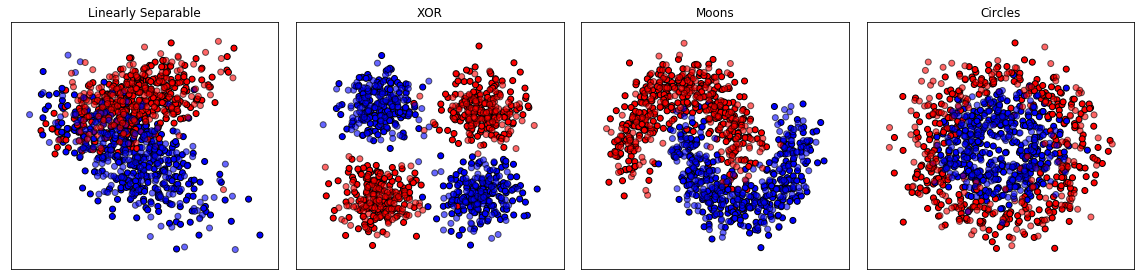

In [3]:
figure = plt.figure(figsize=(16, 4))
i = 1

for ds,dsname in zip(datasets,datasets_names):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    ax = plt.subplot(1, 4, i)
    ax.set_title(dsname)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
                   edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    i+=1
plt.tight_layout()
plt.savefig('DataSets.png')
plt.show()

In [2]:
i=0
times_df = pd.DataFrame(columns=["dataset","estimator"])
for points in [125,250,500,1000,2000,4000,8000,16000]:
    print(points)
    datasets_new = [make_linear(points),
                    make_xor(points),
                    make_moons(noise=0.2, random_state=0,n_samples=points),
                    make_circles(noise=0.2, factor=0.5, random_state=1,n_samples=points)
                   ]
    for ds,dsname in zip(datasets_new,datasets_names):
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
        for alg in Estimators:
            name = alg.__class__.__name__
            start = time.time()
            alg.fit(X_train, y_train)
            end = time.time()
            fit_time = end-start
            score = alg.score(X_test, y_test)            
            i += 1
            times_df.loc[i,"dataset"] = dsname
            times_df.loc[i,"estimator"] = name
            times_df.loc[i,"samples"] = points
            times_df.loc[i,"score"] = score
            times_df.loc[i,"fit_time"] = fit_time


125
250
500
1000
2000
4000
8000
16000


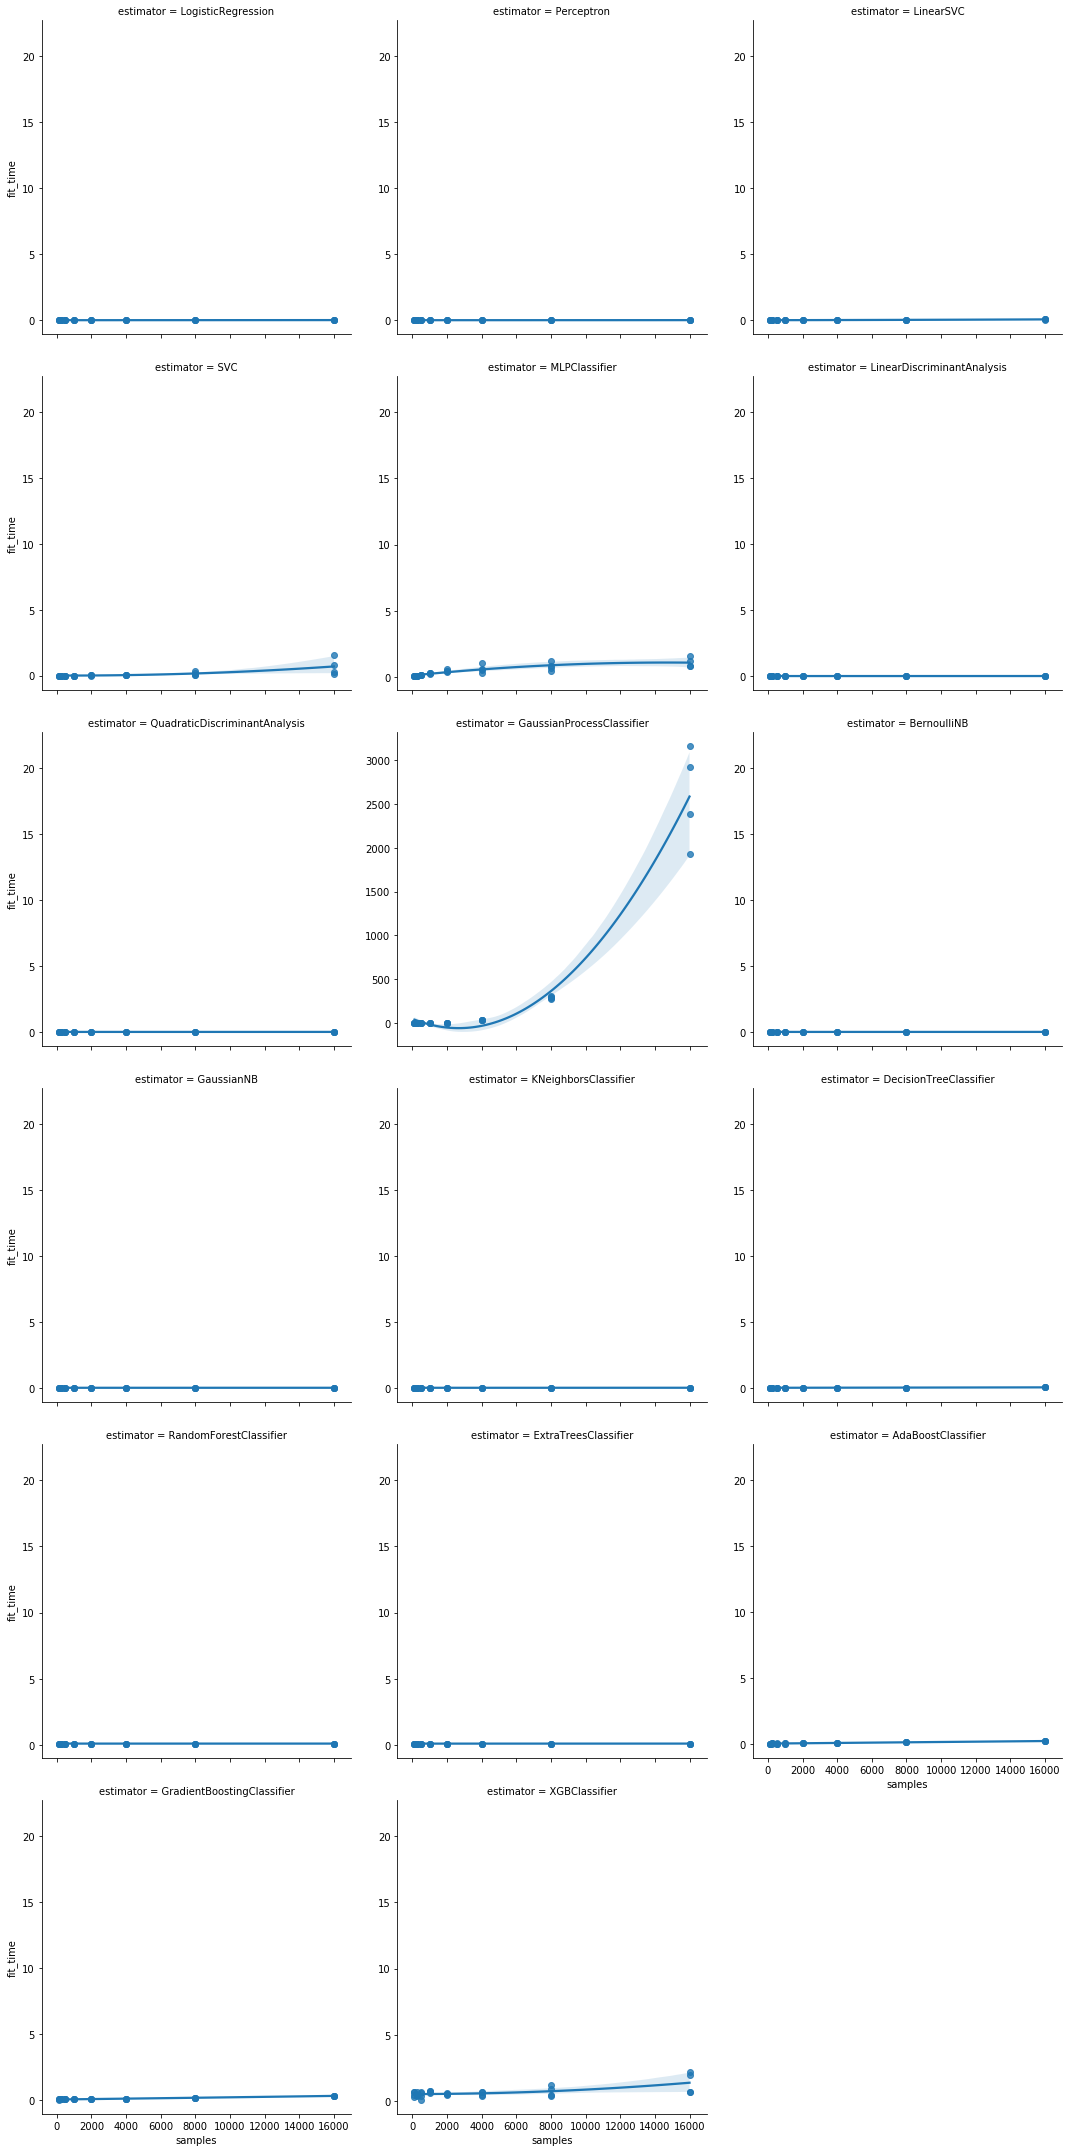

In [7]:
sns.lmplot(x="samples",
           y="fit_time",
           col="estimator",
           col_wrap=3,
           #hue="dataset",
           data=times_df,
           sharey=False,
           truncate=True,
           order=2)

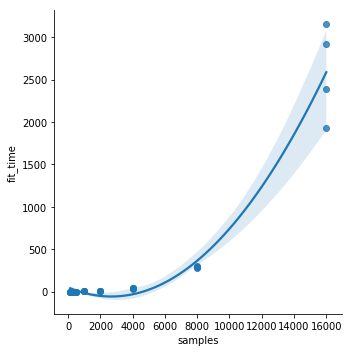

In [9]:
sns.lmplot(x="samples",
           y="fit_time",
           #col="estimator",
           #col_wrap=3,
           #hue="dataset",
           data=times_df[times_df['estimator']=="GaussianProcessClassifier"],
           sharey=False,
           truncate=True,
           order=2)
plt.savefig('GPFitTime.png')
plt.show()